In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.preprocessing import MinMaxScaler

In [2]:
unegui = pd.read_csv('unegui_clean.csv').drop_duplicates()
unegui.head()

,flr_type,balcony,yr_built,garage,window_type,building_height,door_type,flr_lvl,mortgage,district,window_n,location,price,area_m2
0,parquet,2,2021,0,alum,17,burged,15,bank,KU,4,Яармаг,360.000,79.20
1,parquet,1,2019,0,vinyl,16,burged,2,no,SH,2,1-р хороолол,155.000,59.00
2,parquet,1,2018,0,vinyl,12,burged,11,no,SU,2,11-р хороолол,98.000,37.08
3,parquet,1,1980,0,vinyl,5,burged,3,no,BG,4,Төмөр зам,150.000,69.00
4,parquet,1,2021,0,vinyl,12,burged,4,personal,KU,4,Зайсан,280.209,90.39


Added some columns that could be useful

In [3]:
dt = (unegui
      # create columns that could be useful
      .assign(relative_height = lambda x: x.flr_lvl / x.building_height
              , price = lambda x: round(x.price, 2)
              , building_age = lambda x: date.today().year - x.yr_built)
     )
#dt.info()

### Remove some outliers

Manually removed som outliers from the `price` and `area_m2` columns

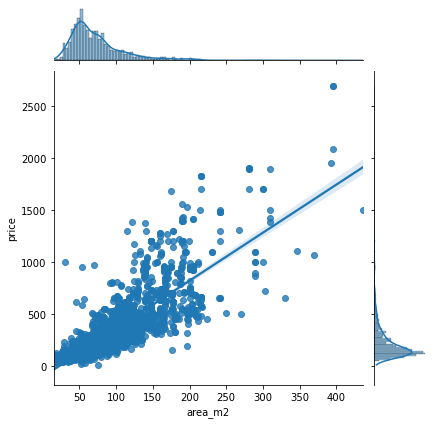

In [4]:
sns.jointplot(data=dt, x='area_m2', y='price', kind='reg')

<AxesSubplot:xlabel='price'>

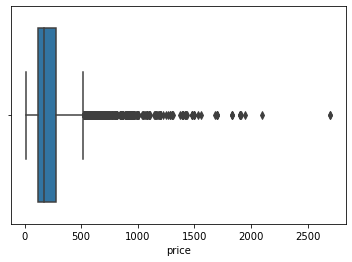

In [5]:
sns.boxplot(data=dt, x='price')

<AxesSubplot:xlabel='area_m2'>

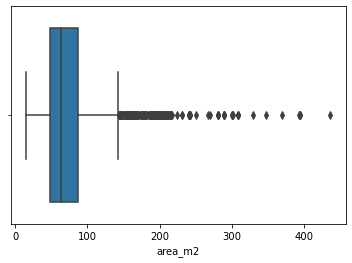

In [6]:
sns.boxplot(data=dt, x='area_m2')

In [7]:
dt = dt.drop(dt[dt['price']>750].index)
dt = dt.drop(dt[dt['area_m2']>250].index)
dt.shape

(6496, 16)

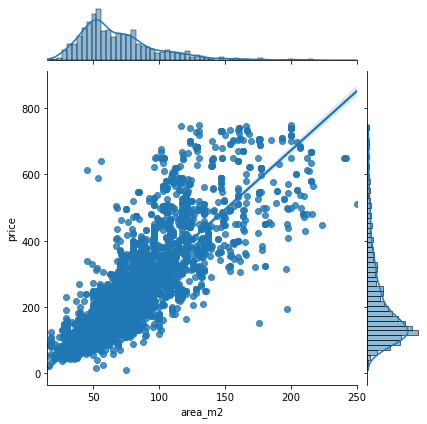

In [8]:
sns.jointplot(data=dt, x='area_m2', y='price', kind='reg')

<AxesSubplot:xlabel='price'>

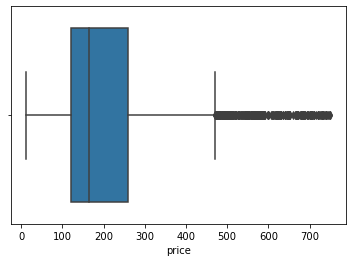

In [9]:
sns.boxplot(data=dt, x='price')

<AxesSubplot:xlabel='area_m2'>

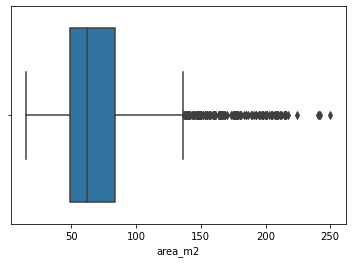

In [10]:
sns.boxplot(data=dt, x='area_m2')

<AxesSubplot:xlabel='district', ylabel='count'>

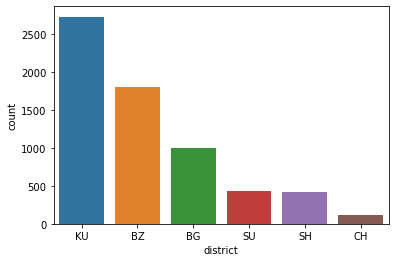

In [11]:
order = dt.district.value_counts().index
order
sns.countplot(data=dt, x='district', order=order)

Most properties are in KU district which makes sense.. 

CH has the least. Should scrape more properties in CH area?

<AxesSubplot:xlabel='balcony', ylabel='price'>

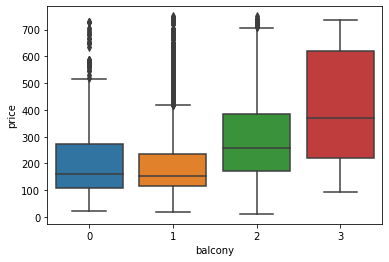

In [12]:
sns.boxplot(data=dt, x='balcony', y='price')

Properties with 0 balcony seem to have similar value or higher than properties with 1 balcony.
Should look more into the data. 

In [13]:
dt.location.value_counts()

Бусад            1139
Яармаг            847
3, 4 хороолол     365
Зайсан            335
13-р хороолол     272
                 ... 
River stone         2
Ханбүргэдэй         2
2 - 7 буудал        1
Био комбинат        1
Дарь Эх             1
Name: location, Length: 77, dtype: int64

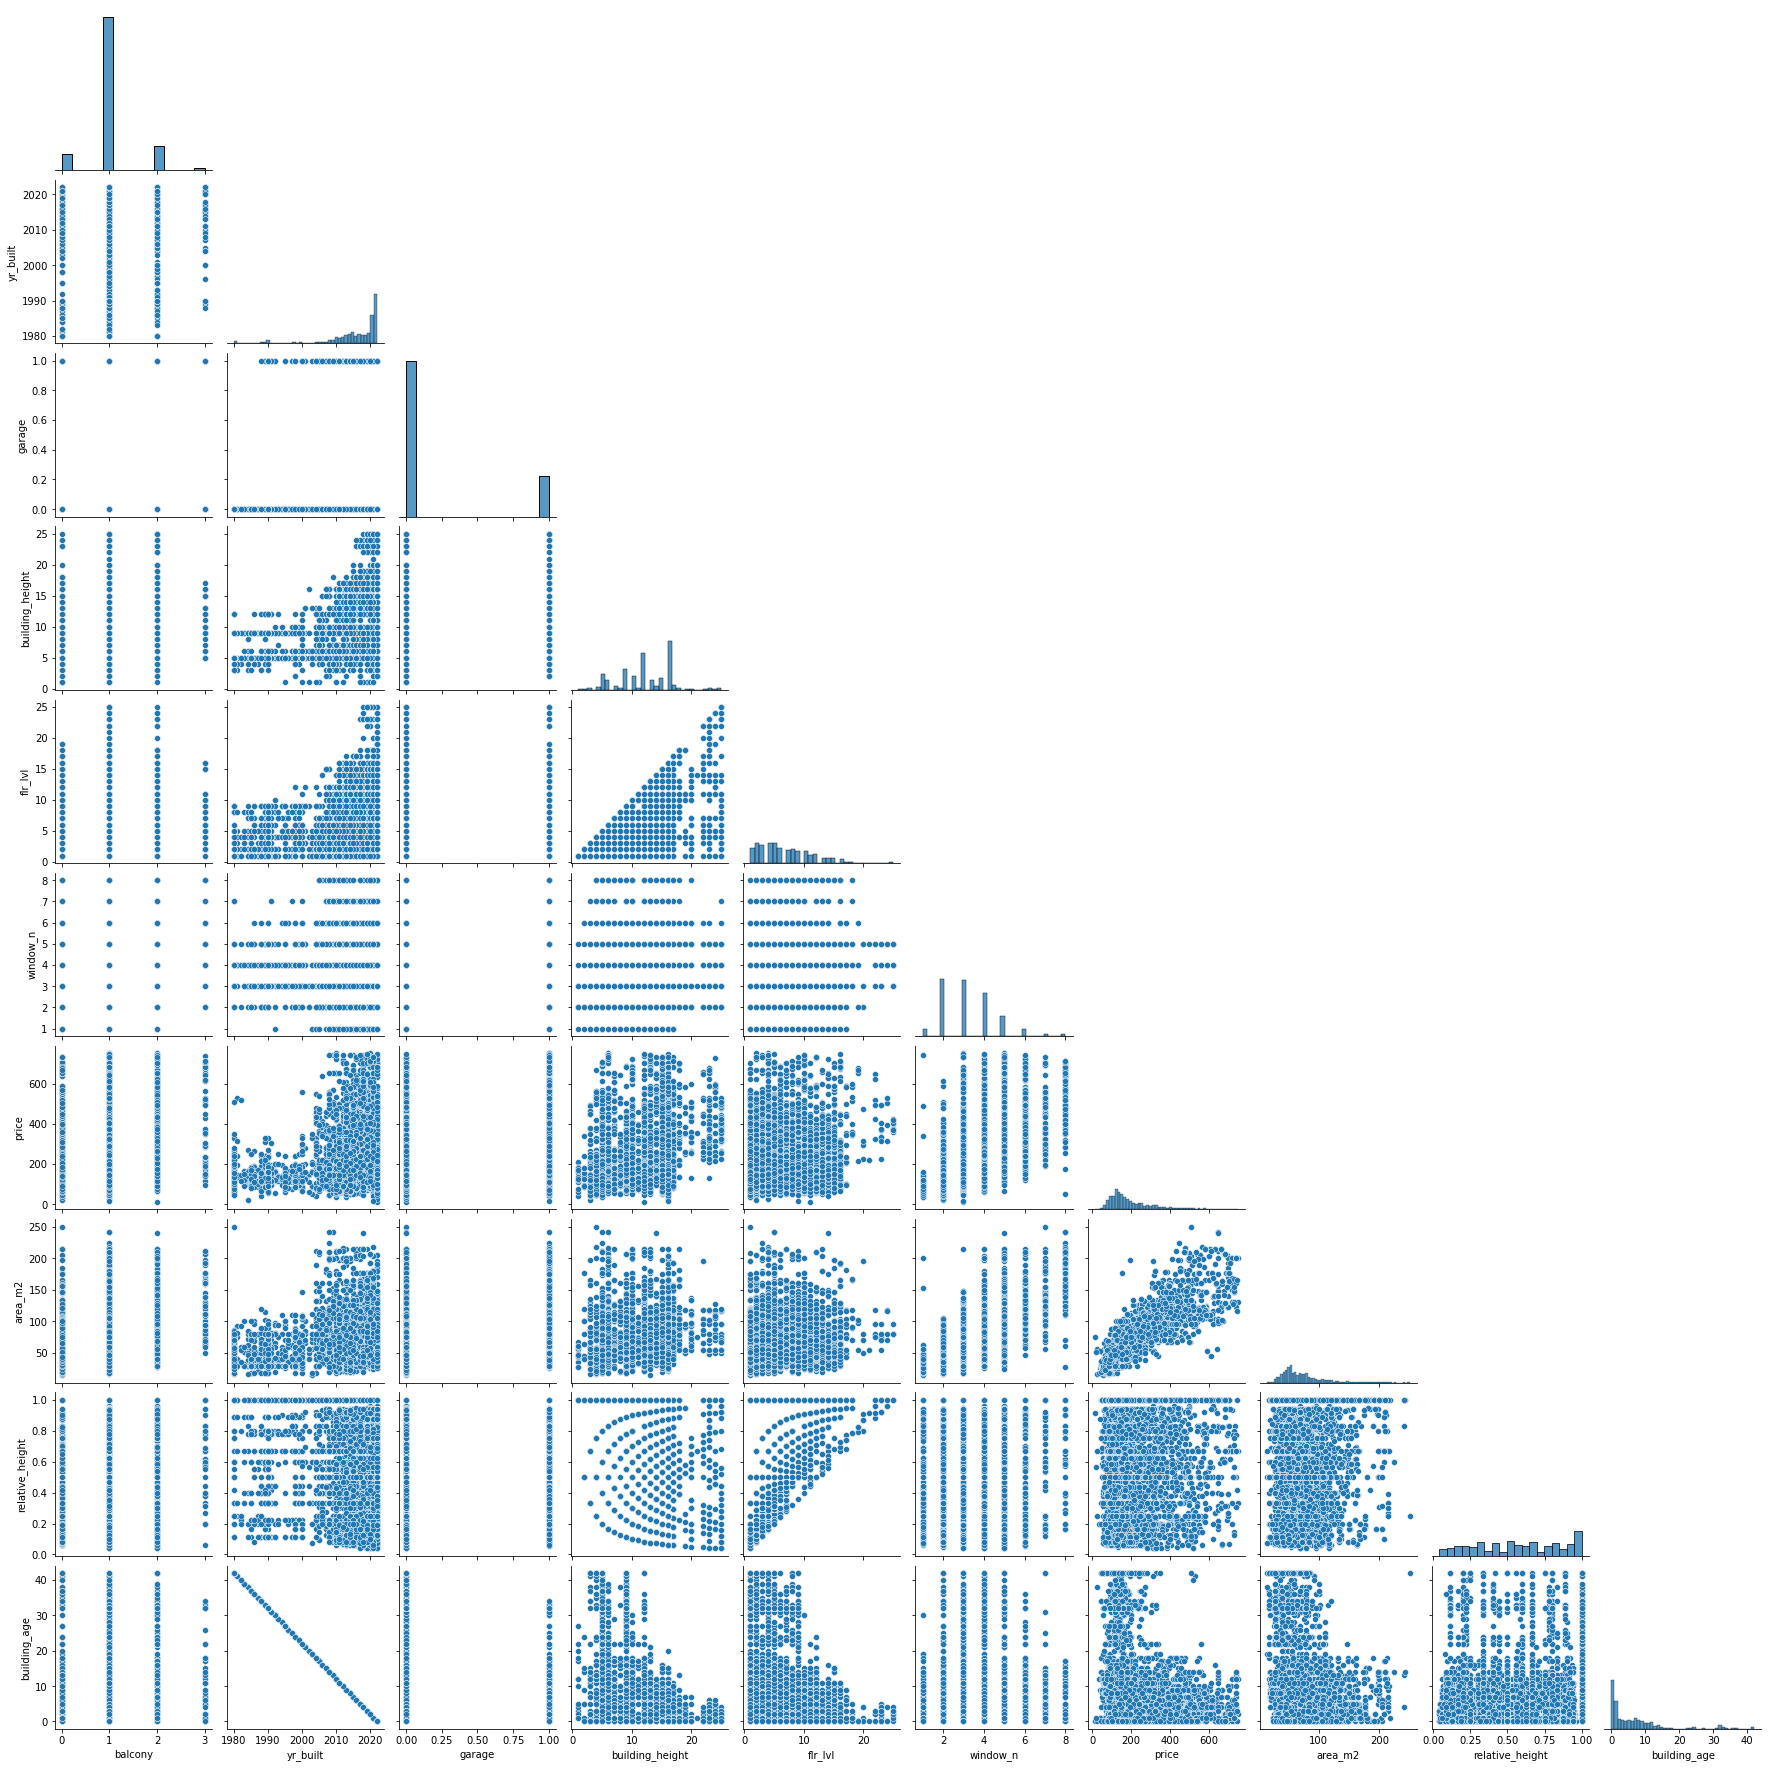

In [14]:
sns.pairplot(dt, diag_kind="hist", corner=True)

<AxesSubplot:>

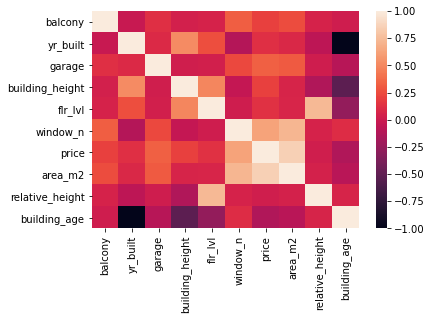

In [15]:
corrmat = dt.corr()
sns.heatmap(corrmat)

<AxesSubplot:>

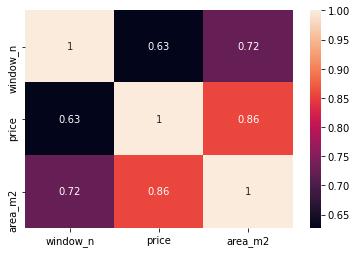

In [16]:
#highly correlated features
high_corr = corrmat.index[abs(corrmat['price'])>0.5]
sns.heatmap(dt[high_corr].corr(),annot=True)

<AxesSubplot:xlabel='window_n', ylabel='price'>

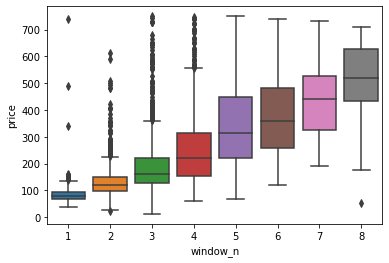

In [17]:
sns.boxplot(data=dt, x='window_n', y='price')

More windows = bigger area = higher price.

The outliers on 1 and 2 are worth looking into

In [18]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6496 entries, 0 to 6934
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flr_type         6496 non-null   object 
 1   balcony          6496 non-null   int64  
 2   yr_built         6496 non-null   int64  
 3   garage           6496 non-null   int64  
 4   window_type      6496 non-null   object 
 5   building_height  6496 non-null   int64  
 6   door_type        6496 non-null   object 
 7   flr_lvl          6496 non-null   int64  
 8   mortgage         6496 non-null   object 
 9   district         6496 non-null   object 
 10  window_n         6496 non-null   int64  
 11  location         6496 non-null   object 
 12  price            6496 non-null   float64
 13  area_m2          6496 non-null   float64
 14  relative_height  6496 non-null   float64
 15  building_age     6496 non-null   int64  
dtypes: float64(3), int64(7), object(6)
memory usage: 1.1+ MB


No missing values

In [19]:
dt = dt.astype({'flr_type':'category',
                 #'balcony':'category',
                 #'yr_built':'category',
                 'garage':'category',
                 'window_type':'category',
                 #'building_height':'category', 
                 'door_type':'category', 
                 #'flr_lvl':'category', 
                 'mortgage':'category', 
                 'district':'category',
                 #'window_n':'category', 
                 'location':'category'
               }) 

In [20]:
dt1 = pd.get_dummies(dt, 
                     columns=['flr_type', 'balcony', 'yr_built', 'garage', 'window_type','building_height', 
                              'door_type', 'flr_lvl', 'mortgage', 'district', 'window_n', 'building_age'],
                     prefix_sep='_')

Transformations

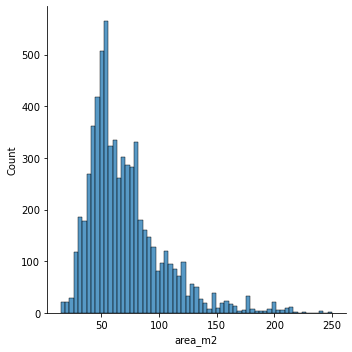

In [21]:
sns.displot(x=dt1['area_m2'])

In [22]:
dt1['area_log'] = np.log1p(dt1['area_m2'])

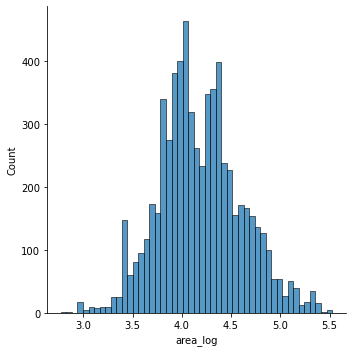

In [23]:
sns.displot(x=dt1['area_log'])

In [24]:
mms = MinMaxScaler()
dt1['area_m2'] = mms.fit_transform(dt1[['area_m2']])

In [25]:
dt1.head()

,location,price,area_m2,relative_height,flr_type_laminate,flr_type_parquet,flr_type_tile,flr_type_wooden,balcony_0,balcony_1,...,building_age_34,building_age_35,building_age_36,building_age_37,building_age_38,building_age_39,building_age_40,building_age_41,building_age_42,area_log
0,Яармаг,360.00,0.273191,0.882353,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.384524
1,1-р хороолол,155.00,0.187234,0.125000,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.094345
2,11-р хороолол,98.00,0.093957,0.916667,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.639689
3,Төмөр зам,150.00,0.229787,0.600000,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,4.248495
4,Зайсан,280.21,0.320809,0.333333,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.515136


In [26]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6496 entries, 0 to 6934
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   flr_type         6496 non-null   category
 1   balcony          6496 non-null   int64   
 2   yr_built         6496 non-null   int64   
 3   garage           6496 non-null   category
 4   window_type      6496 non-null   category
 5   building_height  6496 non-null   int64   
 6   door_type        6496 non-null   category
 7   flr_lvl          6496 non-null   int64   
 8   mortgage         6496 non-null   category
 9   district         6496 non-null   category
 10  window_n         6496 non-null   int64   
 11  location         6496 non-null   category
 12  price            6496 non-null   float64 
 13  area_m2          6496 non-null   float64 
 14  relative_height  6496 non-null   float64 
 15  building_age     6496 non-null   int64   
dtypes: category(7), float64(3), int64(6)
memor

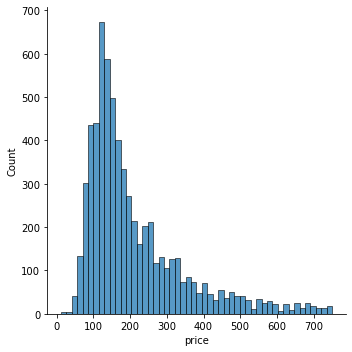

In [27]:
sns.displot(x=dt1['price'])

In [28]:
dt1['price_log'] = np.log10(dt1['price'])

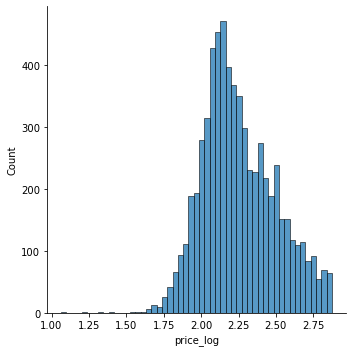

In [29]:
sns.displot(x=dt1['price_log'])

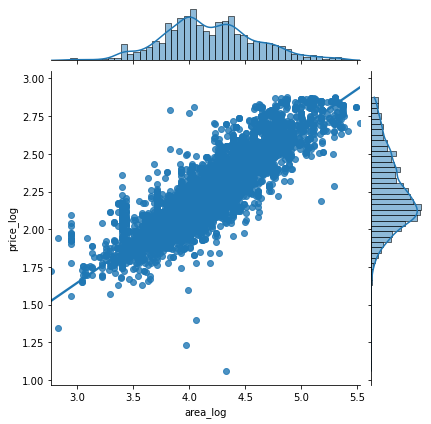

In [30]:
sns.jointplot(data=dt1, x='area_log', y='price_log', kind='reg')

In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score

In [32]:
X = dt1.drop(columns=['price', 'location', 'price_log'])
y = dt1.price_log

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=111)

In [34]:
clf = AdaBoostRegressor(n_estimators=10, random_state=1)
clf.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=10, random_state=1)

In [35]:
clf.score(X_test, y_test)

0.7701543647836173

In [36]:
y_pred = clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred )
print("\nADABOOST REGRESSOR")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))


ADABOOST REGRESSOR
Mean squared error = 0.01
Explained variance score = 0.77


In [37]:
feature_importances=pd.DataFrame({'features':X.columns,'feature_importance':clf.feature_importances_})
print(feature_importances.sort_values('feature_importance',ascending=False).head(50))#.query('feature_importance >= 0.01')

               features  feature_importance
174            area_log            0.416597
0               area_m2            0.306748
99           flr_lvl_11            0.071418
8             balcony_2            0.055918
84       door_type_alum            0.036711
97            flr_lvl_9            0.023376
70   building_height_12            0.019250
7             balcony_1            0.015667
118         district_BZ            0.012416
85     door_type_burged            0.011893
1       relative_height            0.009449
54             garage_1            0.008709
120         district_KU            0.004944
60    building_height_2            0.001609
121         district_SH            0.001600
139      building_age_8            0.001552
67    building_height_9            0.001548
119         district_CH            0.000593
117         district_BG            0.000000
116   mortgage_personal            0.000000
2     flr_type_laminate            0.000000
125          window_n_3         

## AdaBoost 2

In [38]:
dt2 = dt
# pd.get_dummies(dt, 
#                      columns=['district'],
#                      prefix_sep='_')

In [39]:
dt2['area_log'] = np.log1p(dt1['area_m2'])
le = LabelEncoder()
dt2['flr_type'] = le.fit_transform(dt2.flr_type.values)
dt2['district'] = le.fit_transform(dt2.district.values)
dt2['door_type'] = le.fit_transform(dt2.door_type.values)
dt2['window_type'] = le.fit_transform(dt2.window_type.values)
dt2['mortgage'] = le.fit_transform(dt2.mortgage.values)

In [40]:
X = dt2.drop(columns=[
                        'yr_built', 
                        'location', 
                        'area_m2', 
                        'door_type',
                        #'building_height', 
                        'window_type',
                        'mortgage', 
                        'price', 
                        'flr_type', 
                        'balcony',
                        'window_n',
                        'relative_height',
                        'garage',
                        'flr_lvl',
                        'building_age'
])
y = dt2.price

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=111)

In [42]:
clf = AdaBoostRegressor(n_estimators=10, random_state=1)
clf.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=10, random_state=1)

In [43]:
clf.score(X_test, y_test)

0.7540021421350612

In [44]:
y_pred = clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred )
print("\nADABOOST REGRESSOR")
print("Mean squared error =", np.sqrt(mse))
print("Explained variance score =", round(evs, 2))


ADABOOST REGRESSOR
Mean squared error = 67.75631860524939
Explained variance score = 0.77


In [45]:
feature_importances=pd.DataFrame({'features':X.columns,'feature_importance':clf.feature_importances_})
print(feature_importances.sort_values('feature_importance',ascending=False).head(50))#.query('feature_importance >= 0.01')

          features  feature_importance
2         area_log            0.930990
0  building_height            0.047353
1         district            0.021657


Conclusion:
- Collect more features with predictive power.
- Audit some observations. Since the data is entered by users, there could be faulty entries along with some inconsistency that leads to outliers that don't make sense.
- Try different wrangling and preprocessing.
- Scrape more data.

In [46]:
import xgboost as xgb

#xgb = xgb.XGBRegressor()

In [47]:
data_dmatrix = xgb.DMatrix(data=X,label=y, enable_categorical=True)

In [48]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.3,
                max_depth = 10, alpha = 10, n_estimators = 80)

In [49]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [50]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 51.725102


In [73]:
params = {'objective':'reg:squarederror','colsample_bytree': 0.3,'learning_rate': 1,
                'max_depth': 10, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=10,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [74]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,125.924716,0.817189,125.971733,1.695024
1,84.754432,28.933929,89.177857,26.357530
2,83.014206,30.164858,87.684140,27.412152
3,78.732331,28.328620,84.559921,25.291033
4,78.656953,28.267909,84.505992,25.220581
